In [1]:
!pip install bertopic

  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039278 sha256=4bc8f6e306e0a75703d67dc82829038a6061b64a13cd719596e44970b2104700
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [15]:
import pandas as pd
import numpy as np
from bertopic import BERTopic
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def get_ngrams(text, n=2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []

    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
    except(RuntimeError):
        pass

    return ' '.join(returnVal).strip()

In [17]:
df["bigram_text"] = df['tweet_limpios'].apply(get_ngrams, n=2)

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATATHON/tweets_limpios.csv').fillna(0)
df.head(5)

,Unnamed: 0,date,time,tweet,tweet_limpios
0,0,2023-01-01,0,"Resuelto, muchísimas gracias , excelente servi...",Resuelto muchísimas gracias excelente servici...
1,1,2023-01-02,0,"Muchas gracias, espero su dm",Muchas gracias espero dm
2,2,2023-01-02,0,Muchas gracias!,Muchas gracias!
3,3,2023-01-02,0,Algo similar me paso. Quería renovar mi token ...,Algo similar paso Quería renovar token poder ...
4,4,2023-01-02,0,Yeeeei! a través de mi cuenta en acabo de cont...,Yeeeei! través cuenta acabo contratar cuenta ...


## Analizando el texto para 10 topicos

In [11]:
topic_model_n = BERTopic(nr_topics = 10)
topic_model_b = BERTopic(nr_topics = 10,n_gram_range=(2,2))
topics_n, probs_n = topic_model_n.fit_transform(df['tweet_limpios'])
topics_b, probs_b = topic_model_b.fit_transform(df['tweet_limpios'])
df['t1'] = topics_n
df['t2'] = topics_b
print(np.unique(topics_n),np.unique(topics_b))

[-1  0  1  2  3  4  5  6  7  8] [-1  0  1  2  3  4  5  6  7  8]


In [27]:
for topico in np.unique(topics_n):
  datos_aux_1 = df[df['t1']==topico]['tweet_limpios']
  datos_aux_2 = df[df['t2']==topico]['bigram_text']
  juntar_1 = ''
  juntar_2 = ''
  for oracion in range(datos_aux_1.shape[0]):
    juntar_1 = juntar_1 + ' ' + datos_aux_1.iloc[oracion]
  for oracion in range(datos_aux_2.shape[0]):
    juntar_2 = juntar_2 + ' ' + datos_aux_2.iloc[oracion]

  img_n = WordCloud().generate(juntar_1)
  img_b = WordCloud().generate(juntar_2)
  plt.figure(figsize=(15,15))
  plt.subplot(1,2,1)
  plt.imshow(img_n, interpolation='bilinear')
  plt.axis("off")
  plt.title(topico)
  plt.subplot(1,2,2)
  plt.imshow(img_b, interpolation='bilinear')
  plt.axis("off")
  plt.title(topico)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [23]:
topic_model_n.visualize_topics()

In [24]:
topic_model_b.visualize_topics()

In [33]:
topic_model_n = BERTopic(nr_topics = 9)
topic_model_b = BERTopic(nr_topics = 9,n_gram_range=(2,2))
topics_n, probs_n = topic_model_n.fit_transform(df['tweet_limpios'])
topics_b, probs_b = topic_model_b.fit_transform(df['tweet_limpios'])
df['t1'] = topics_n
df['t2'] = topics_b
print(np.unique(topics_n),np.unique(topics_b))

[-1  0  1  2  3  4  5  6  7] [-1  0  1  2  3  4  5  6  7]


In [34]:
for topico in np.unique(topics_n):
  datos_aux_1 = df[df['t1']==topico]['tweet_limpios']
  datos_aux_2 = df[df['t2']==topico]['bigram_text']
  juntar_1 = ''
  juntar_2 = ''
  for oracion in range(datos_aux_1.shape[0]):
    juntar_1 = juntar_1 + ' ' + datos_aux_1.iloc[oracion]
  for oracion in range(datos_aux_2.shape[0]):
    juntar_2 = juntar_2 + ' ' + datos_aux_2.iloc[oracion]

  img_n = WordCloud().generate(juntar_1)
  img_b = WordCloud().generate(juntar_2)
  plt.figure(figsize=(15,15))
  plt.subplot(1,2,1)
  plt.imshow(img_n, interpolation='bilinear')
  plt.axis("off")
  plt.title(topico)
  plt.subplot(1,2,2)
  plt.imshow(img_b, interpolation='bilinear')
  plt.axis("off")
  plt.title(topico)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [35]:
topic_model_n = BERTopic(nr_topics = 8)
topic_model_b = BERTopic(nr_topics = 8,n_gram_range=(2,2))
topics_n, probs_n = topic_model_n.fit_transform(df['tweet_limpios'])
topics_b, probs_b = topic_model_b.fit_transform(df['tweet_limpios'])
df['t1'] = topics_n
df['t2'] = topics_b
print(np.unique(topics_n),np.unique(topics_b))

[-1  0  1  2  3  4  5  6] [-1  0  1  2  3  4  5  6]


In [36]:
for topico in np.unique(topics_n):
  datos_aux_1 = df[df['t1']==topico]['tweet_limpios']
  datos_aux_2 = df[df['t2']==topico]['bigram_text']
  juntar_1 = ''
  juntar_2 = ''
  for oracion in range(datos_aux_1.shape[0]):
    juntar_1 = juntar_1 + ' ' + datos_aux_1.iloc[oracion]
  for oracion in range(datos_aux_2.shape[0]):
    juntar_2 = juntar_2 + ' ' + datos_aux_2.iloc[oracion]

  img_n = WordCloud().generate(juntar_1)
  img_b = WordCloud().generate(juntar_2)
  plt.figure(figsize=(15,15))
  plt.subplot(1,2,1)
  plt.imshow(img_n, interpolation='bilinear')
  plt.axis("off")
  plt.title(topico)
  plt.subplot(1,2,2)
  plt.imshow(img_b, interpolation='bilinear')
  plt.axis("off")
  plt.title(topico)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [37]:
topic_model_n = BERTopic(nr_topics = 7)
topic_model_b = BERTopic(nr_topics = 7,n_gram_range=(2,2))
topics_n, probs_n = topic_model_n.fit_transform(df['tweet_limpios'])
topics_b, probs_b = topic_model_b.fit_transform(df['tweet_limpios'])
df['t1'] = topics_n
df['t2'] = topics_b
print(np.unique(topics_n),np.unique(topics_b))

[-1  0  1  2  3  4  5] [-1  0  1  2  3  4  5]


In [38]:
for topico in np.unique(topics_n):
  datos_aux_1 = df[df['t1']==topico]['tweet_limpios']
  datos_aux_2 = df[df['t2']==topico]['bigram_text']
  juntar_1 = ''
  juntar_2 = ''
  for oracion in range(datos_aux_1.shape[0]):
    juntar_1 = juntar_1 + ' ' + datos_aux_1.iloc[oracion]
  for oracion in range(datos_aux_2.shape[0]):
    juntar_2 = juntar_2 + ' ' + datos_aux_2.iloc[oracion]

  img_n = WordCloud().generate(juntar_1)
  img_b = WordCloud().generate(juntar_2)
  plt.figure(figsize=(15,15))
  plt.subplot(1,2,1)
  plt.imshow(img_n, interpolation='bilinear')
  plt.axis("off")
  plt.title(topico)
  plt.subplot(1,2,2)
  plt.imshow(img_b, interpolation='bilinear')
  plt.axis("off")
  plt.title(topico)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [39]:
topic_model_n = BERTopic(nr_topics = 6)
topic_model_b = BERTopic(nr_topics = 6,n_gram_range=(2,2))
topics_n, probs_n = topic_model_n.fit_transform(df['tweet_limpios'])
topics_b, probs_b = topic_model_b.fit_transform(df['tweet_limpios'])
df['t1'] = topics_n
df['t2'] = topics_b
print(np.unique(topics_n),np.unique(topics_b))

[-1  0  1  2  3  4] [-1  0  1  2  3  4]


In [40]:
for topico in np.unique(topics_n):
  datos_aux_1 = df[df['t1']==topico]['tweet_limpios']
  datos_aux_2 = df[df['t2']==topico]['bigram_text']
  juntar_1 = ''
  juntar_2 = ''
  for oracion in range(datos_aux_1.shape[0]):
    juntar_1 = juntar_1 + ' ' + datos_aux_1.iloc[oracion]
  for oracion in range(datos_aux_2.shape[0]):
    juntar_2 = juntar_2 + ' ' + datos_aux_2.iloc[oracion]

  img_n = WordCloud().generate(juntar_1)
  img_b = WordCloud().generate(juntar_2)
  plt.figure(figsize=(15,15))
  plt.subplot(1,2,1)
  plt.imshow(img_n, interpolation='bilinear')
  plt.axis("off")
  plt.title(topico)
  plt.subplot(1,2,2)
  plt.imshow(img_b, interpolation='bilinear')
  plt.axis("off")
  plt.title(topico)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [41]:
topic_model_n = BERTopic(nr_topics = 5)
topic_model_b = BERTopic(nr_topics = 5,n_gram_range=(2,2))
topics_n, probs_n = topic_model_n.fit_transform(df['tweet_limpios'])
topics_b, probs_b = topic_model_b.fit_transform(df['tweet_limpios'])
df['t1'] = topics_n
df['t2'] = topics_b
print(np.unique(topics_n),np.unique(topics_b))

[-1  0  1  2  3] [-1  0  1  2  3]


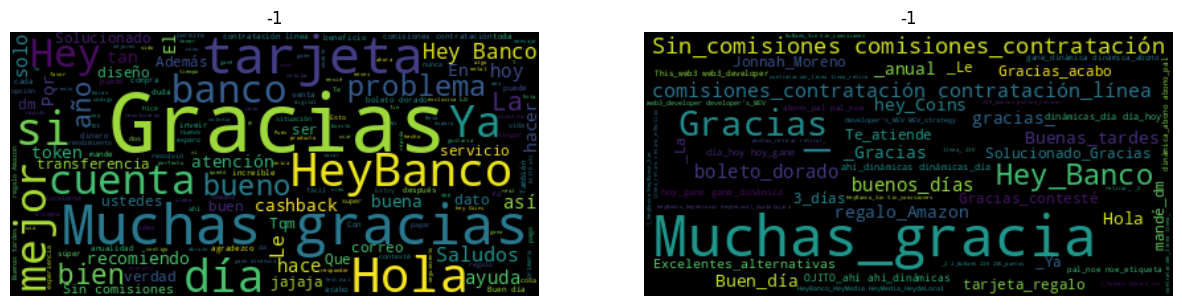

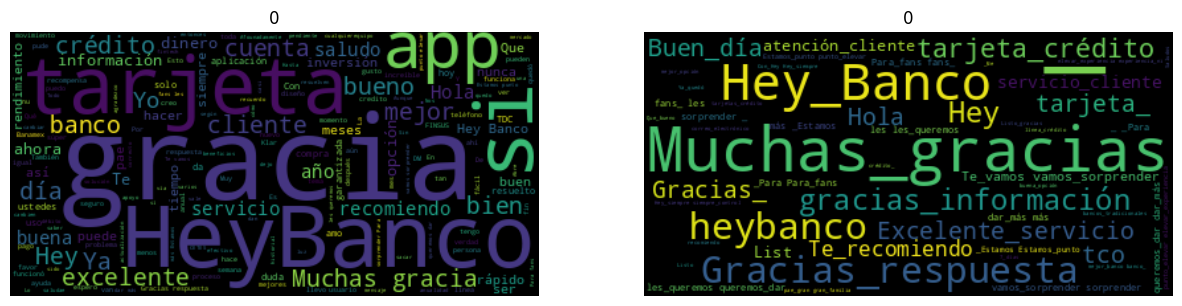

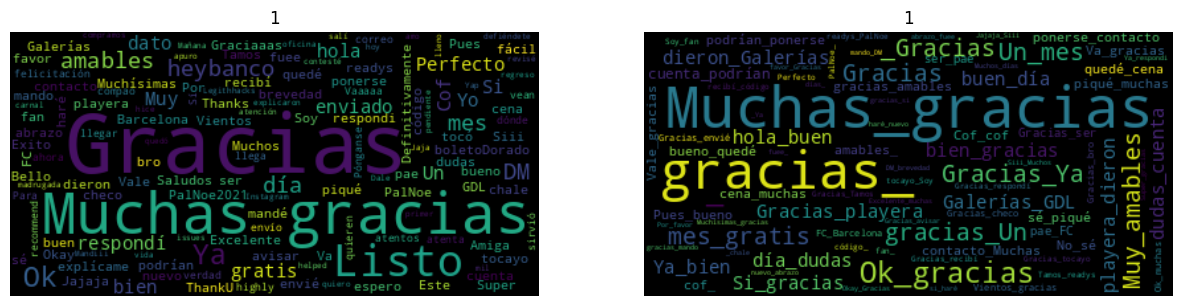

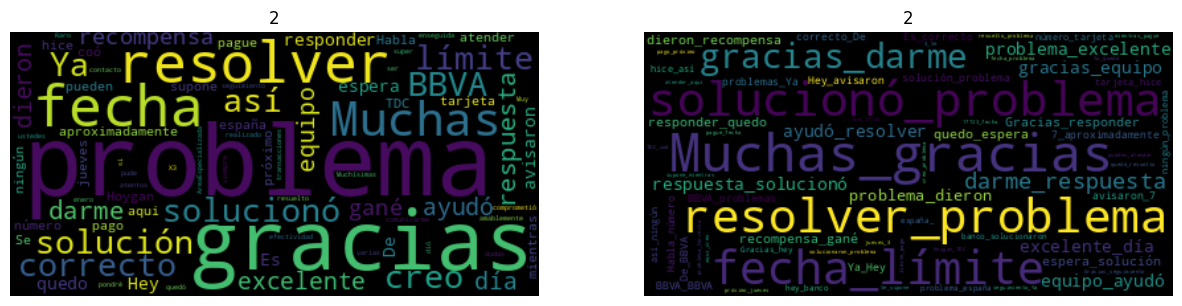

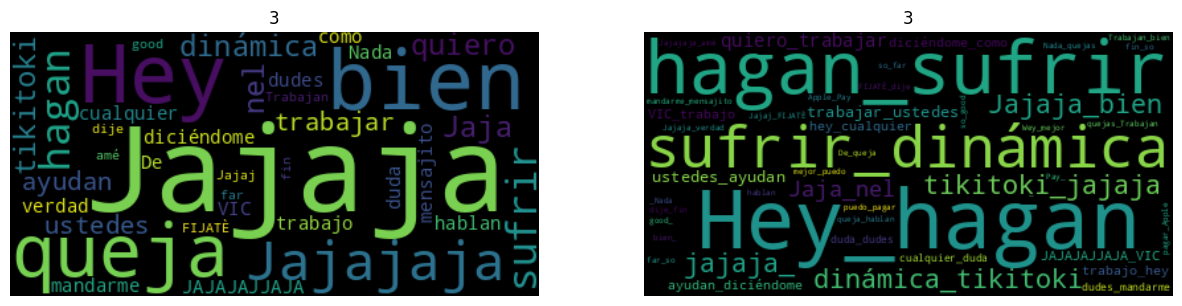

In [42]:
for topico in np.unique(topics_n):
  datos_aux_1 = df[df['t1']==topico]['tweet_limpios']
  datos_aux_2 = df[df['t2']==topico]['bigram_text']
  juntar_1 = ''
  juntar_2 = ''
  for oracion in range(datos_aux_1.shape[0]):
    juntar_1 = juntar_1 + ' ' + datos_aux_1.iloc[oracion]
  for oracion in range(datos_aux_2.shape[0]):
    juntar_2 = juntar_2 + ' ' + datos_aux_2.iloc[oracion]

  img_n = WordCloud().generate(juntar_1)
  img_b = WordCloud().generate(juntar_2)
  plt.figure(figsize=(15,15))
  plt.subplot(1,2,1)
  plt.imshow(img_n, interpolation='bilinear')
  plt.axis("off")
  plt.title(topico)
  plt.subplot(1,2,2)
  plt.imshow(img_b, interpolation='bilinear')
  plt.axis("off")
  plt.title(topico)
  plt.show()

In [43]:
topic_model_n = BERTopic(nr_topics = 4)
topic_model_b = BERTopic(nr_topics = 4,n_gram_range=(2,2))
topics_n, probs_n = topic_model_n.fit_transform(df['tweet_limpios'])
topics_b, probs_b = topic_model_b.fit_transform(df['tweet_limpios'])
df['t1'] = topics_n
df['t2'] = topics_b
print(np.unique(topics_n),np.unique(topics_b))

[-1  0  1  2] [-1  0  1  2]


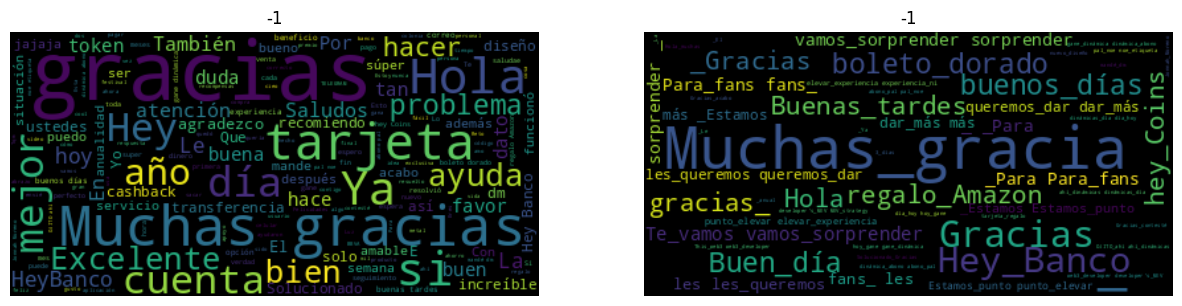

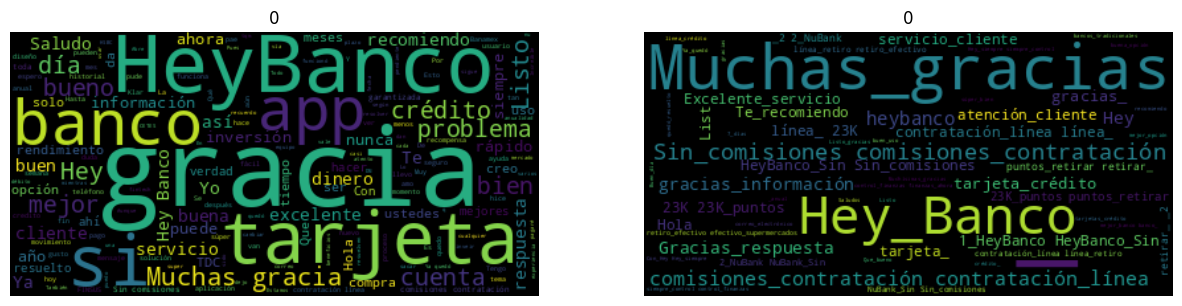

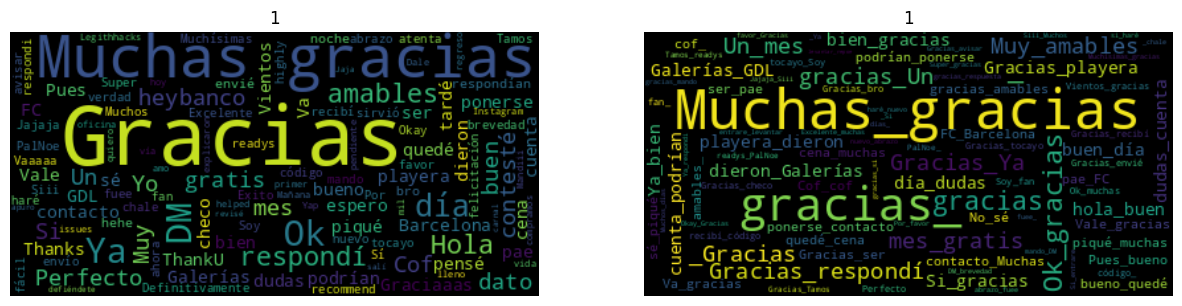

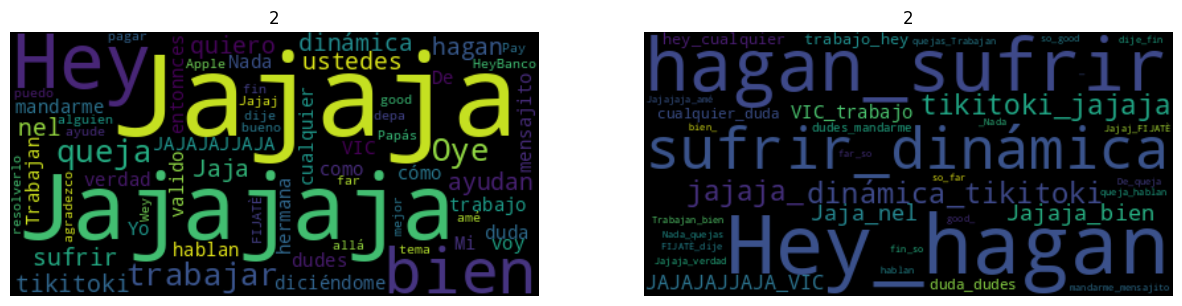

In [44]:
for topico in np.unique(topics_n):
  datos_aux_1 = df[df['t1']==topico]['tweet_limpios']
  datos_aux_2 = df[df['t2']==topico]['bigram_text']
  juntar_1 = ''
  juntar_2 = ''
  for oracion in range(datos_aux_1.shape[0]):
    juntar_1 = juntar_1 + ' ' + datos_aux_1.iloc[oracion]
  for oracion in range(datos_aux_2.shape[0]):
    juntar_2 = juntar_2 + ' ' + datos_aux_2.iloc[oracion]

  img_n = WordCloud().generate(juntar_1)
  img_b = WordCloud().generate(juntar_2)
  plt.figure(figsize=(15,15))
  plt.subplot(1,2,1)
  plt.imshow(img_n, interpolation='bilinear')
  plt.axis("off")
  plt.title(topico)
  plt.subplot(1,2,2)
  plt.imshow(img_b, interpolation='bilinear')
  plt.axis("off")
  plt.title(topico)
  plt.show()

In [45]:
topic_model_b9 = BERTopic(nr_topics = 9,n_gram_range=(2,2))
topic_model_b8 = BERTopic(nr_topics = 8,n_gram_range=(2,2))
topic_model_b7 = BERTopic(nr_topics = 7,n_gram_range=(2,2))
topic_model_b6 = BERTopic(nr_topics = 6,n_gram_range=(2,2))
topic_model_b5 = BERTopic(nr_topics = 5,n_gram_range=(2,2))
topic_model_b4 = BERTopic(nr_topics = 4,n_gram_range=(2,2))

topics_b, probs_b = topic_model_b9.fit_transform(df['tweet_limpios'])
topics_b, probs_b = topic_model_b8.fit_transform(df['tweet_limpios'])
topics_b, probs_b = topic_model_b7.fit_transform(df['tweet_limpios'])
topics_b, probs_b = topic_model_b6.fit_transform(df['tweet_limpios'])
topics_b, probs_b = topic_model_b5.fit_transform(df['tweet_limpios'])
topics_b, probs_b = topic_model_b4.fit_transform(df['tweet_limpios'])

In [46]:
topic_model_b9.visualize_topics()

In [48]:
topic_model_b8.visualize_topics()

In [49]:
topic_model_b7.visualize_topics()

In [50]:
topic_model_b6.visualize_topics()

In [51]:
topic_model_b5.visualize_topics()

In [55]:
topic_model_b7 = BERTopic(nr_topics = 7,n_gram_range=(2,2))
topics_b, probs_b = topic_model_b7.fit_transform(df['tweet_limpios'])

In [57]:
df = df[['date','time','tweet','tweet_limpios','bigram_text']]

In [59]:
df['topic'] = topics_b

In [60]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/DATATHON/topics.csv',index=False)